**Progression towards learning repositioning without explicitly taught rules**

1. Points on 2D curve
2. Sparse Circles on 2D curve
3. (Loose circular clusters to 2D curve)

4. Points to 3D curve
5. Sparse shapes to 3D curve
6. (Loose shape clusters to 3D curve) <br>
**and finally...**
7. Scanned bone shapes to defined curve
8. Scanned bone shapes learned curve

**1. Points fitted to 2D Curve**<br\>
Dataset creation <br\>
Network definition <br\>
Train & test framework <br\>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader, TensorDataset
import time

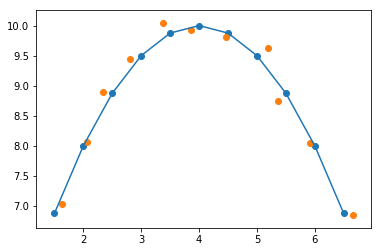

In [2]:
# Dataset creation
def curve_points():
    """create x,y arrays along 2nd order polynomial"""
    #e.g. y = -0.5 x^2 + 4 x + 2 for simple example
    coeff = np.array([-0.5, 4, 2])
    x_start = 1.5
    x_end = 7
    x_vals = np.arange(x_start, x_end, 0.5)
    y_vals = np.polyval(coeff, x_vals)
    return x_vals, y_vals
x,y = curve_points()
        
def noise(coords,delta):
    coords_noise = coords + np.random.uniform(-delta, delta, coords.shape)
    return coords_noise.astype("double")
    
xn = noise(x, 0.2)
yn = noise(y, 0.2)

def plot_points(x,y,xn=None, yn=None):
    # plot original points
    plt.plot(x,y)
    plt.scatter(x,y)
    if xn is not None:
        # also plot noised points
        plt.scatter(xn,yn)
    plt.show()
    
plot_points(x,y,xn,yn)

N_SAMPLES = 100 

true_row = np.concatenate((x,y), axis=0)
TRUE = np.vstack([true_row]*N_SAMPLES)
NOISE = []

for i in range(N_SAMPLES):
    noise_row = np.concatenate((noise(x,0.2), noise(y,0.2)), axis=0)
    NOISE.append(noise_row)
NOISE = np.vstack(NOISE)

# convert to tensor
TRUE = torch.from_numpy(TRUE).float()
NOISE = torch.from_numpy(NOISE).float()


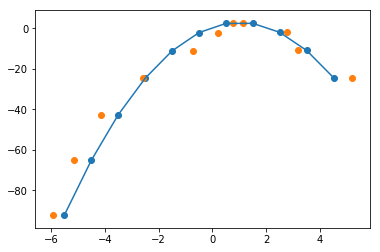

In [18]:
def diff_curves():
    # y = ax2 + bx + c
    a = 0.5*np.random.randn() - 2
    b = 2 * np.random.randn() + 2 
    c = 2*np.random.randn()
    coeff = np.array([a, b, c])
    x_start = -5.5
    x_end = 5.5
    x_vals = np.arange(x_start, x_end, 1)
    y_vals = np.polyval(coeff, x_vals)
    return x_vals, y_vals

# x_diff, y_diff = diff_curves()
# x_d, y_d = diff_curves()
# print len(x_diff)
# plot_points(x_diff,y_diff, x_d, y_d)

# this time create 1000 samples:

TRUE_DIFF = []
NOISE_DIFF = []
for i in range(1000):
    xd, yd = diff_curves()
    xn = noise(xd, np.random.uniform(0,1)*1)
    yn = noise(yd, np.random.uniform(0,1)*1)
    true_row = np.concatenate((xd,yd), axis=0)
    noise_row = np.concatenate((xn, yn), axis=0)
    TRUE_DIFF.append(true_row)
    NOISE_DIFF.append(noise_row)
    
NOISE_DIFF = np.vstack(NOISE_DIFF)
TRUE_DIFF = np.vstack(TRUE_DIFF)
z = NOISE_DIFF[0][:11]
u = NOISE_DIFF[0][11:22]
i = TRUE_DIFF[0][:11]
o = TRUE_DIFF[0][11:22]

plot_points(i, o, z, u)
# convert to tensor
TRUE_DIFF = torch.from_numpy(TRUE_DIFF).float()
NOISE_DIFF = torch.from_numpy(NOISE_DIFF).float()



In [19]:
class LinearNet(nn.Module):
    """input is size 22, output size 22, some linear layers in between"""
    def __init__(self):
        super(LinearNet, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(22,220),
            nn.Sigmoid(),
            nn.Linear(220,220),
            nn.ReLU(),
            nn.Linear(220,220),
            nn.Sigmoid(),
            nn.Linear(220,22)
        )
    def forward(self, x):
        x = self.layers(x)
        return x


Epoch [1/100], Iter [5/10] Loss: 534.301330566
Epoch [1/100], Iter [10/10] Loss: 496.225799561
Epoch [2/100], Iter [5/10] Loss: 479.805328369
Epoch [2/100], Iter [10/10] Loss: 447.211090088
Epoch [3/100], Iter [5/10] Loss: 441.243255615
Epoch [3/100], Iter [10/10] Loss: 415.639068604
Epoch [4/100], Iter [5/10] Loss: 410.446075439
Epoch [4/100], Iter [10/10] Loss: 386.301574707
Epoch [5/100], Iter [5/10] Loss: 381.385009766
Epoch [5/100], Iter [10/10] Loss: 359.425201416
Epoch [6/100], Iter [5/10] Loss: 355.258026123
Epoch [6/100], Iter [10/10] Loss: 335.142486572
Epoch [7/100], Iter [5/10] Loss: 331.519592285
Epoch [7/100], Iter [10/10] Loss: 313.075408936
Epoch [8/100], Iter [5/10] Loss: 309.700042725
Epoch [8/100], Iter [10/10] Loss: 292.418914795
Epoch [9/100], Iter [5/10] Loss: 289.24911499
Epoch [9/100], Iter [10/10] Loss: 273.245819092
Epoch [10/100], Iter [5/10] Loss: 270.317626953
Epoch [10/100], Iter [10/10] Loss: 255.250305176
Epoch [11/100], Iter [5/10] Loss: 252.425888062
E

Epoch [88/100], Iter [10/10] Loss: 10.4122695923
Epoch [89/100], Iter [5/10] Loss: 8.88364315033
Epoch [89/100], Iter [10/10] Loss: 10.0146636963
Epoch [90/100], Iter [5/10] Loss: 8.52470302582
Epoch [90/100], Iter [10/10] Loss: 9.65393352509
Epoch [91/100], Iter [5/10] Loss: 8.18478870392
Epoch [91/100], Iter [10/10] Loss: 9.31551170349
Epoch [92/100], Iter [5/10] Loss: 7.86847639084
Epoch [92/100], Iter [10/10] Loss: 8.99461174011
Epoch [93/100], Iter [5/10] Loss: 7.56845617294
Epoch [93/100], Iter [10/10] Loss: 8.68928527832
Epoch [94/100], Iter [5/10] Loss: 7.28707933426
Epoch [94/100], Iter [10/10] Loss: 8.41097259521
Epoch [95/100], Iter [5/10] Loss: 7.02260017395
Epoch [95/100], Iter [10/10] Loss: 8.13865280151
Epoch [96/100], Iter [5/10] Loss: 6.77091503143
Epoch [96/100], Iter [10/10] Loss: 7.87934017181
Epoch [97/100], Iter [5/10] Loss: 6.53366327286
Epoch [97/100], Iter [10/10] Loss: 7.64122962952
Epoch [98/100], Iter [5/10] Loss: 6.3108496666
Epoch [98/100], Iter [10/10] Lo

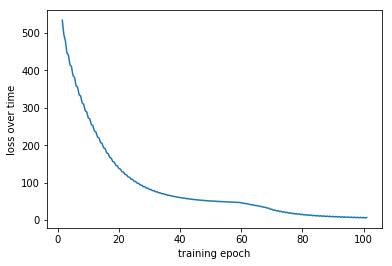

In [25]:
net = LinearNet()

# Hyper Parameters
num_epochs = 100
batch_size = 100
learning_rate = 0.001


# features: 2D, 1 row is one training example
# targets: 2D/1D, 1 row is one training example
train = TensorDataset(NOISE_DIFF, TRUE_DIFF)
train_loader = DataLoader(train, batch_size=batch_size, shuffle=False)
BRAIN_TRACKER = []

def optimizer(test_net, num_epochs):
    start_time = time.time()
    epoch_data = []
    loss_data = []
    # Loss and Optimizer
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(test_net.parameters(), lr=learning_rate)
    # Train the Model
    for epoch in range(num_epochs):
        for i, (noisy, testy) in enumerate(train_loader):
            noise_curve = Variable(noisy)
            true_curve = Variable(testy)

            # Forward + Backward + Optimize
            optimizer.zero_grad()
            outputs = test_net(noise_curve)
            loss = criterion(outputs, true_curve)
            loss.backward()
            optimizer.step()

            if (i+1) % 5 == 0:
                # for plotting, append epoch and loss data to timeseries:
                epoch_data.append(epoch+1+(i+1)/10.0) # epochs as 1, 1.5, 2.0 etc
                loss_data.append(loss.data[0])
                # print updates:
                print "Epoch [{}/{}], Iter [{}/{}] Loss: {}".format(epoch+1, num_epochs, i+1, len(train)//batch_size, loss.data[0])
                BRAIN_TRACKER.append(outputs[0])
    print("time elapsed: {}".format(time.time()-start_time))
    plt.plot(epoch_data, loss_data)
    plt.ylabel('loss over time')
    plt.xlabel('training epoch')
    plt.show()
    
optimizer(net, num_epochs)



**2. Circles fitted to curve**<br\>
Dataset creation <br\>
Network definition <br\>
Train & test framework <br\>

In [ ]:
## ball_x, ball_y = diff_curves()
ball_r = [2,2,1,1,0.5,0.5,0.5,1,1,2,2]
ball_r = [r*2 for r in ball_r]

fig, ax = plt.subplots()
ax.plot(ball_x, ball_y)
ax.axis("equal")
for i, r in enumerate(ball_r):
    bx = ball_x[i]
    by = ball_y[i]
    ax.add_patch(plt.Circle((bx, by), ball_r[i], color='r'))    
plt.show()